In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [3]:
c_regret = []
T = 100000
for path in range(30):
    loss = 0
    losses = np.zeros(10)
    net_losses = np.zeros(10)
    t_arr = np.arange(T)
    c_loss = np.zeros_like(t_arr, dtype=float)
    for t in range(T):
        i = np.argmin(net_losses)
        losses[:-2]   =  np.random.choice(2, size=8, p=[0.5, 0.5])
        losses[-2]    =  np.random.choice(2, p=[0.6,0.4])
        delta         =  0.1 if t<T/2 else -0.2
        losses[-1]    =  np.random.choice(2, p=[0.5-delta,0.5+delta])
        c_loss[t]     =  losses[i] + c_loss[t-1]
        net_losses    += losses
        pass
    c_regret.append(c_loss - t_arr*0.4)

In [4]:
c_regret = np.array(c_regret)
mean_r = np.ones_like(c_regret[0])
upper_r = np.ones_like(c_regret[0])
lower_r = np.ones_like(c_regret[0])
for i,regret in enumerate(c_regret.T):
    mean_r[i], lower_r[i], upper_r[i] = mean_confidence_interval(regret)

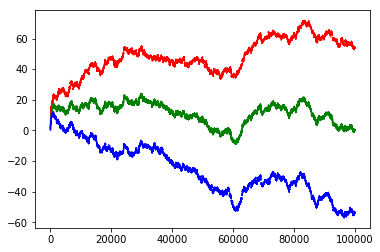

In [5]:
fig, ax = plt.subplots()
ax.plot(t_arr,mean_r,'g')
ax.plot(t_arr,upper_r,'r--')
ax.plot(t_arr,lower_r,'b--')
plt.show()

In [6]:
c_regret = []
T = 100000
eta = 2*np.sqrt(np.log(10)/T)
for path in range(30):
    loss = 0
    losses = np.zeros(10)
    net_losses = np.zeros(10)
    t_arr = np.arange(T)
    c_loss = np.zeros_like(t_arr, dtype=float)
    for t in range(T):
        w = np.exp(-eta*net_losses)
        w = w/np.sum(w)
        
        losses[:-2]   =  np.random.choice(2, size=8, p=[0.5, 0.5])
        losses[-2]    =  np.random.choice(2, p=[0.6,0.4])
        delta         =  0.1 if t<T/2 else -0.2
        losses[-1]    =  np.random.choice(2, p=[0.5-delta,0.5+delta])
        
        #import pdb; pdb.set_trace()
        c_loss[t]     =  np.sum(w*losses) + c_loss[t-1]
        net_losses    += losses
        pass
    c_regret.append(c_loss - t_arr*0.4)

In [7]:
c_regret = np.array(c_regret)
mean_r = np.ones_like(c_regret[0])
upper_r = np.ones_like(c_regret[0])
lower_r = np.ones_like(c_regret[0])
for i,regret in enumerate(c_regret.T):
    mean_r[i], lower_r[i], upper_r[i] = mean_confidence_interval(regret)

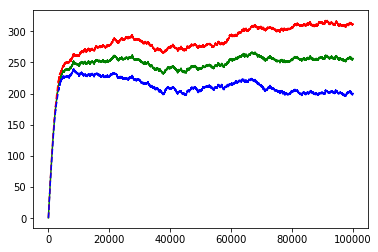

In [8]:
fig, ax = plt.subplots()
ax.plot(t_arr,mean_r,'g')
ax.plot(t_arr,upper_r,'r--')
ax.plot(t_arr,lower_r,'b--')
plt.show()

In [9]:
numpaths = 30
c_regrets = []
T = 10000
eta_s = np.sqrt(2*np.log(10)/T)
C = np.linspace(0.1,2.1,11)
for c in C:
    c_regret = []
    eta = c*eta_s
    for path in range(numpaths):
        loss = 0
        losses = np.zeros(10)
        net_losses = np.zeros(10)
        t_arr = np.arange(T)
        c_loss = 0.0
        for t in range(T):
            w = np.exp(-eta*net_losses)
            w = w/np.sum(w)

            losses[:-2]   =  np.random.choice(2, size=8, p=[0.5, 0.5])
            losses[-2]    =  np.random.choice(2, p=[0.6,0.4])
            delta         =  0.1 if t<T/2 else -0.2
            losses[-1]    =  np.random.choice(2, p=[0.5-delta,0.5+delta])

            #import pdb; pdb.set_trace()
            c_loss        =  np.sum(w*losses) + c_loss
            net_losses    += losses
            pass
        c_regret.append(c_loss - 0.4*T)
    c_regrets.append(c_regret)
c_regret = np.array(c_regrets).T

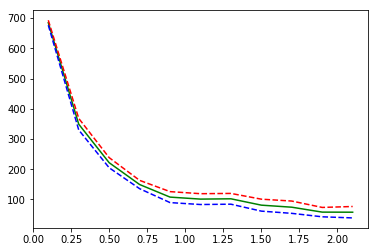

In [10]:
mean_r = np.ones_like(c_regret[0])
upper_r = np.ones_like(c_regret[0])
lower_r = np.ones_like(c_regret[0])
for i,regret in enumerate(c_regret.T):
    mean_r[i], lower_r[i], upper_r[i] = mean_confidence_interval(regret)
fig, ax = plt.subplots()
ax.plot(C,mean_r,'g')
ax.plot(C,upper_r,'r--')
ax.plot(C,lower_r,'b--')
plt.show()